In [1]:
!git clone --branch develop https://github.com/nikhilvsupekar/SinGAN

Cloning into 'SinGAN'...
remote: Enumerating objects: 934, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 934 (delta 86), reused 86 (delta 44), pack-reused 802
Receiving objects: 100% (934/934), 95.01 MiB | 32.55 MiB/s, done.
Resolving deltas: 100% (398/398), done.


In [2]:
!pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 37.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [2]:
import torch 
from torch.utils.data import TensorDataset, DataLoader
import tqdm
import numpy as np
import torch.nn as nn
import torch
import numpy as np
import torch.nn.functional as F
import pickle
import torch
import tqdm
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau


import os
from pathlib import Path



In [3]:
os.chdir('SinGAN')
print(os.getcwd())
!python -m pip install -r requirements.txt

/content/SinGAN


In [17]:
!git status -s

?? Input/Images/leaf_LR.png
?? edge_SR_2x.png
?? edge_SR_4x.png
?? edge_SR_8x.png
?? embeddings.pt
?? loss.png
?? sr_high_2x.png
?? sr_high_4x.png
?? sr_high_8x.png
?? sr_low.png
?? sr_orig.png
?? sr_output/


In [36]:
!git reset --hard

HEAD is now at 7ee384d bgr to rgb fix


In [37]:
!git pull origin develop

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/nikhilvsupekar/SinGAN
 * branch            develop    -> FETCH_HEAD
   7ee384d..30b5901  develop    -> origin/develop
Updating 7ee384d..30b5901
Fast-forward
 SR.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!pwd

/content/SinGAN


In [35]:
!rm -r TrainedModels/

In [ ]:
!rm -r TrainedModels/
!python SR.py --input_name 260081_LR.png --niter 10 --sr_epochs 10


Random Seed:  137
*** Train SinGAN for SR ***
GENERATOR input = torch.Size([1, 3, 37, 28])
final size (27, 18)
GENERATOR head output = torch.Size([1, 32, 35, 26])
GENERATOR body output = torch.Size([1, 32, 28, 20])
GENERATOR tail output = torch.Size([1, 3, 27, 18])
y shape = torch.Size([1, 3, 37, 28])
scale 0:[0/10]
scale 0:[9/10]
GENERATOR input = torch.Size([1, 3, 43, 32])
final size (33, 22)
GENERATOR head output = torch.Size([1, 32, 41, 30])
GENERATOR body output = torch.Size([1, 32, 34, 24])
GENERATOR tail output = torch.Size([1, 3, 33, 22])
y shape = torch.Size([1, 3, 43, 32])
scale 1:[0/10]
scale 1:[9/10]
GENERATOR input = torch.Size([1, 3, 50, 37])
final size (40, 27)
GENERATOR head output = torch.Size([1, 32, 48, 35])
GENERATOR body output = torch.Size([1, 32, 42, 28])
GENERATOR tail output = torch.Size([1, 3, 40, 27])
y shape = torch.Size([1, 3, 50, 37])
scale 2:[0/10]
scale 2:[9/10]
GENERATOR input = torch.Size([1, 3, 58, 42])
final size (48, 32)
GENERATOR head output = torc

In [27]:
import cv2
im = cv2.imread('edge_SR_2x.png')

In [95]:
!zip -r /content/SinGAN/sr_output/conf1_epoch=975.zip /content/SinGAN/sr_output/conf1_epoch=975.pt

  adding: content/SinGAN/sr_output/conf1_epoch=975.pt (deflated 8%)


In [ ]:
!zip -r /content/SinGAN/embeddings.zip /content/SinGAN/embeddings.pt

  adding: content/SinGAN/embeddings.pt (deflated 9%)


In [ ]:
# from google.colab import files
# files.download("/content/SinGAN/sr_low.png")
# files.download("/content/SinGAN/sr_orig.png")
# files.download("/content/SinGAN/sr_high_2x.png")
# files.download("/content/SinGAN/sr_high_4x.png")
# files.download("/content/SinGAN/sr_high_8x.png")


In [ ]:
# !python random_samples.py --input_name balloons.png --mode random_samples --gen_start_scale 5

Random Seed:  4457


In [ ]:
"""def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()"""

Saving unnamed.jpg to unnamed.jpg


['unnamed.jpg']

In [18]:
import torch
out = torch.load('embeddings.pt')

images = list(zip(*out))[0]
embeddings = list(zip(*out))[1]

In [ ]:

class DownBlock(nn.Sequential):
    def __init__(self, in_channel, out_channel, ker_size, padd, stride):
        super(DownBlock,self).__init__()
        self.add_module('down', nn.MaxPool2d(2))
        self.add_module('conv',nn.Conv2d(in_channel ,out_channel,kernel_size=ker_size,stride=stride,padding=padd)),
        self.add_module('norm',nn.BatchNorm2d(out_channel)),
        self.add_module('LeakyRelu',nn.LeakyReLU(0.2, inplace=True))


class SR(nn.Module):
    def __init__(self, embeddings):
        super(SR, self).__init__()
        

        with torch.no_grad():
            embeddings = [x.squeeze(0).resize_((32, 32, 32)) for x in embeddings]
            embeddings = torch.cat(embeddings).unsqueeze(0).to('cuda:0')

            emb_down_block = DownBlock(in_channel = embeddings.shape[1], out_channel = 16, 
                                        ker_size = 5, padd = 0, stride = 1).to('cuda:0')

            emb_conv = emb_down_block(embeddings)
            self.emb = emb_conv.view(-1)
            emb_size = self.emb.shape[0]

        self.linear1 = nn.Linear(emb_size + 2, 512 * 2)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(512 * 2 + 2, 512)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(512 + 2, 64)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(64 + 2, 3)

    def forward(self, locs):
        
        embeddings_repeated = self.emb.repeat(locs.shape[0], 1, 1)
        embeddings_with_coords = torch.cat([embeddings_repeated, locs], dim=2)
        
        y = self.linear1(embeddings_with_coords)
        y = self.relu1(y)
        y = torch.cat([y, locs], dim=2)
        y = self.linear2(y)
        y = self.relu2(y)
        y = torch.cat([y, locs], dim=2)
        y = self.linear3(y)
        y = self.relu3(y)
        y = torch.cat([y, locs], dim=2)
        y = self.linear4(y)
        
        return y


In [ ]:
from torchsummary import summary

embeddings = list(zip(*out))[1]
model = SR(embeddings).to('cuda:0')

summary(model, (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1024]       2,362,368
              ReLU-2              [-1, 1, 1024]               0
            Linear-3               [-1, 1, 512]         525,824
              ReLU-4               [-1, 1, 512]               0
            Linear-5                [-1, 1, 64]          32,960
              ReLU-6                [-1, 1, 64]               0
            Linear-7                 [-1, 1, 3]             201
Total params: 2,921,353
Trainable params: 2,921,353
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 11.14
Estimated Total Size (MB): 11.17
----------------------------------------------------------------


In [17]:
def get_pixel_data_from_image(img, base_img):
    img = img.squeeze(0).permute(1, 2, 0)
    base_img = base_img.squeeze(0).permute(1, 2, 0)
    coords = []
    targets = []

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            color = list(img[i, j].cpu().numpy())
            scaled_i = i * base_img.shape[0] / img.shape[0]
            scaled_j = j * base_img.shape[1] / img.shape[1]

            coords.append([scaled_i, scaled_j])
            targets.append(color)
    
    return torch.from_numpy(np.array(coords)), torch.from_numpy(np.array(targets))


def get_SR_inputs_targets(images):
    coords, targets = tuple(zip(*[get_pixel_data_from_image(img, images[0]) for img in images]))
    
    return torch.cat(coords).unsqueeze(1), torch.cat(targets).unsqueeze(1)

In [ ]:
pixel_inputs, color_targets = get_SR_inputs_targets(images)
pixel_inputs.shape, color_targets.shape

(torch.Size([30116, 1, 2]), torch.Size([30116, 1, 3]))

In [ ]:
def train_SR(model, input_tensor, output_tensor, num_epochs = 1000, batch_size = 64, output_dir = 'sr_output'):
    SEED = 123
    EPOCH_START = 0
    EPOCH_END = num_epochs
    SAVE_FREQ = 25
    SAVE_PATH = output_dir
    CONF_NAME = 'conf4'

    LR = 0.0001
    BATCH_SIZE = batch_size
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

    train_dataset = TensorDataset(input_tensor.float().to(device), output_tensor.float().to(device))
    train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = False)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr = LR)
    # scheduler = StepLR(optimizer, step_size = 50, gamma = 0.75)
    scheduler = ReduceLROnPlateau(optimizer)

    torch.manual_seed(SEED)

    model.to(device)
    model.train()

    losses = []

    for epoch in range(EPOCH_START, EPOCH_END):

        running_loss = 0.0
        
        for i, data in enumerate(train_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            point_outputs = model(inputs)
            loss = criterion(point_outputs, labels)
            
            loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        
        scheduler.step(running_loss)

        if epoch % SAVE_FREQ == 0:
            model_path = os.path.join(SAVE_PATH, CONF_NAME + '_epoch=' + str(epoch) + '.pt')
            pickle_path = os.path.join(SAVE_PATH, CONF_NAME + '_loss_list_epoch=' + str(epoch) + '.pt')
            
            torch.save(model.state_dict(), model_path)
            with open(pickle_path, 'wb+') as f:
                pickle.dump(losses, f)
        
        print(f"epoch {epoch} loss = {running_loss/(i+1)}")
        losses.append(running_loss/(i+1))

    print('SR training finished')
    return losses


In [20]:
# Path('sr_output').mkdir(parents=True, exist_ok=True)

from SinGAN.models import SR

out = torch.load('embeddings.pt')

images = list(zip(*out))[0]
embeddings = list(zip(*out))[1]

input_tensor, output_tensor = get_SR_inputs_targets(images)
model = SR(embeddings).to('cuda:0')


# losses = train_SR(model, input_tensor, output_tensor, num_epochs = 1000, batch_size = 64, output_dir = 'sr_output')

In [30]:

def create_image_from_output(output_tensor, h, w):
    x = torch.zeros(1, 3, h, w)

    for i in range(0, h):
        for j in range(0, w):
            t = w * i + j
            x[0, :, i, j] = output_tensor[t, 0, :]
    
    return x
        

In [ ]:
x = create_image_from_output(output_tensor, 27, 18)

In [ ]:
output_tensor[0:486, :, :].permute(1, 2, 0).view(1, 3, 27, 18)

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9996, -1.0000, -1.0000],
          ...,
          [-1.0000, -0.9998, -1.0000,  ..., -0.8824, -1.0000, -1.0000],
          [-0.9994, -1.0000, -0.9855,  ..., -0.9614, -0.9197, -1.0000],
          [-1.0000, -0.9221, -0.6460,  ..., -0.6649, -0.5801, -0.7155]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -0.9998, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9993, -1.0000, -0.9854,  ..., -0.9659, -0.9194, -1.0000],
          [-1.0000, -0.9104, -0.6187,  ..., -0.6419, -0.5547, -0.6880]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -

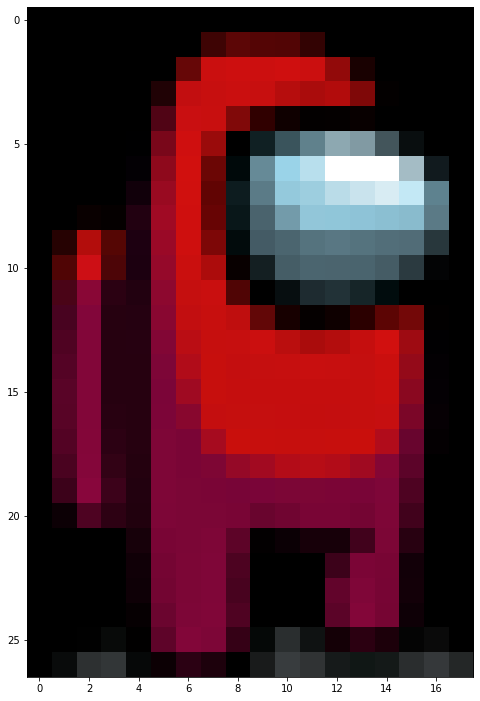

In [ ]:
plt.figure(figsize = (8, 15))

# k = output_tensor[0:486, :, :].view(1, 3, 27, 18)
# k = output_tensor[0:486, 0, :].view(27, 18, 3).permute(2, 0, 1).unsqueeze(1)
k = output_tensor[0:486, :, :].permute(1, 2, 0).view(1, 3, 27, 18)
img_plot = functions.convert_image_np(k)
plt.imshow(img_plot)
plt.show()


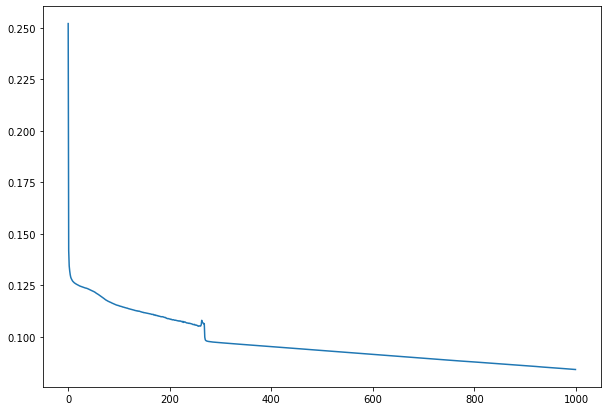

In [ ]:
plt.figure(figsize = (10, 7))

plt.plot(list(range(len(losses))), losses)

In [39]:
from SinGAN.models import SR

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

model_path = 'sr_output/conf1_epoch=975.pt'
embeddings_path = 'embeddings.pt'

out = torch.load(embeddings_path)

images = list(zip(*out))[0]
embeddings = list(zip(*out))[1]

base_img = images[0]

model = SR(embeddings).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

model.set_emb(embeddings)


In [40]:
def predict(model, input_tensor):

    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    BATCH_SIZE = 128

    dataset = TensorDataset(input_tensor.float().to(device))
    dataloader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle = False)

    model.to(device)
    model.eval()

    inputs = []
    losses = []
    running_loss = 0.0
    outputs = []

    for i, data in tqdm.tqdm(enumerate(dataloader, 0)):
        
        input = data[0].to(device)
        inputs.append(input)

        with torch.no_grad():
            output = model(input)
        outputs.append(output)
        
        losses.append(running_loss/(i+1))

    # predictions = torch.cat(outputs).squeeze(1).cpu().numpy()
    return torch.cat(outputs), torch.cat(inputs)


In [41]:
len(images)

6

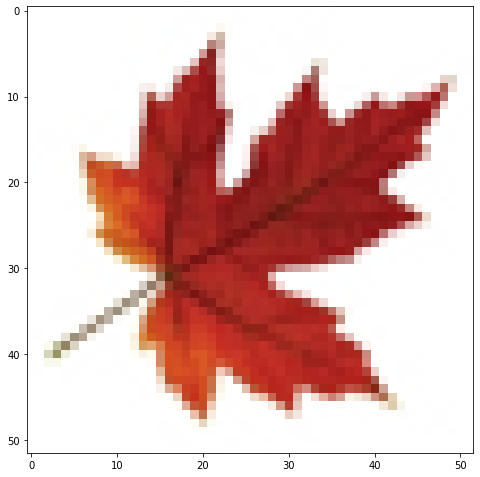

In [42]:
import SinGAN.functions as functions
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 15))

img_plot = functions.convert_image_np(images[5])
plt.imshow(img_plot)
plt.show()


In [43]:
def predict_image(model, target_h, target_w, base_img):
    base_img = base_img.squeeze(0).permute(1, 2, 0)
    coords = []
    scaled_coords = []

    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

    for i in range(target_h):
        for j in range(target_w):
            coords.append([i, j])
            scaled_coords.append([i * base_img.shape[0] / target_h, j * base_img.shape[1] / target_w])

    input_tensor = torch.from_numpy(np.array(scaled_coords)).unsqueeze(1).float().to(device)

    pred, inp = predict(model, input_tensor)
    reshape_size = list(pred.permute(1, 2, 0).shape[0:2]) + [target_h, target_w]
    pred_img = pred.permute(1, 2, 0).view(*reshape_size)
    # pred_img = create_image_from_output(pred, target_h, target_w)
    
    plt.figure(figsize = (8, 15))

    img_plot = functions.convert_image_np(pred_img)
    plt.imshow(img_plot)
    plt.show()


In [80]:
target_h = 27
target_w = 18
base_img = images[0]

base_img = base_img.squeeze(0).permute(1, 2, 0)
coords = []
scaled_coords = []

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

for i in range(target_h):
    for j in range(target_w):
        coords.append([i, j])
        scaled_coords.append([i * base_img.shape[0] / target_h, j * base_img.shape[1] / target_w])

input_tensor = torch.from_numpy(np.array(scaled_coords)).unsqueeze(1).float().to(device)

pred, inp = predict(model, input_tensor)

4it [00:00, 548.85it/s]


In [48]:
pred.shape, inp.shape

(torch.Size([486, 1, 3]), torch.Size([486, 1, 2]))

In [67]:
inp.squeeze(0)

torch.Size([486, 1, 2])

In [90]:
from skimage import io as img
import cv2

img1 = img.imread('/content/SinGAN/Input/Images/leaf_LR.png')

img2 = cv2.resize(img1, dsize=(120 * 4, 120 * 4))

In [92]:
torch.from_numpy(img1).permute(2, 0, 1).shape

torch.Size([3, 120, 120])

In [93]:
img1 = img.imread('/content/SinGAN/Input/Images/leaf_LR.png')
img1 = cv2.resize(img1, dsize=(480, 480))
img1 = cv2.resize(img1, dsize=(120 * 4, 120 * 4))
img1 = img1 / 255
img1 = (img1 - 0.5) * 2
img1 = np.clip(img1, -1, 1)

# for i in range(pred.shape[0]):
#     hr_x, hr_y = tuple(inp[i, :])
#     color = pred[i, :]

#     img1[hr_x, hr_y] = color

img1 = (img1 + 1) / 2
img1 = np.clip(img1, 0, 1)

# img1 = torch.from_numpy(img1).to(device).permute(2, 0, 1).unsqueeze(0)
# img_plot = functions.convert_image_np(img1)
plt.imsave('high.png', img1, vmin=0, vmax=1)
plt.show()

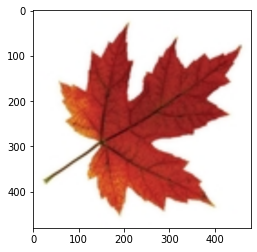

In [73]:
plt.imshow(img2)

In [84]:

plt.imsave('high.png', img2, vmin = 0, vmax = 1)

In [76]:
from SinGAN import functions

img1 = img2
img1 = torch.from_numpy(img1).to(device).permute(2, 0, 1).unsqueeze(0)
plt.figure(figsize = (8, 15))
img_plot = functions.convert_image_np(img1)
plt.imsave('test.png', img_plot, vmin=0, vmax=1)
plt.show()

<Figure size 576x1080 with 0 Axes>

4it [00:00, 612.60it/s]


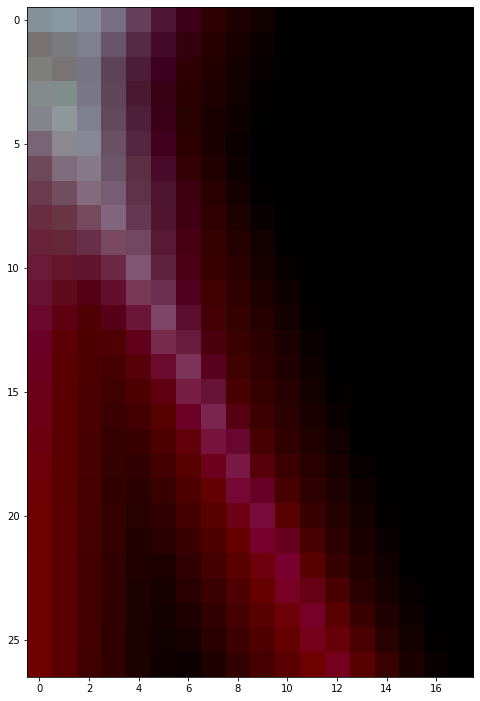

In [44]:
predict_image(model, target_h = 27, target_w = 18, base_img = images[0])

1200it [00:01, 805.54it/s]


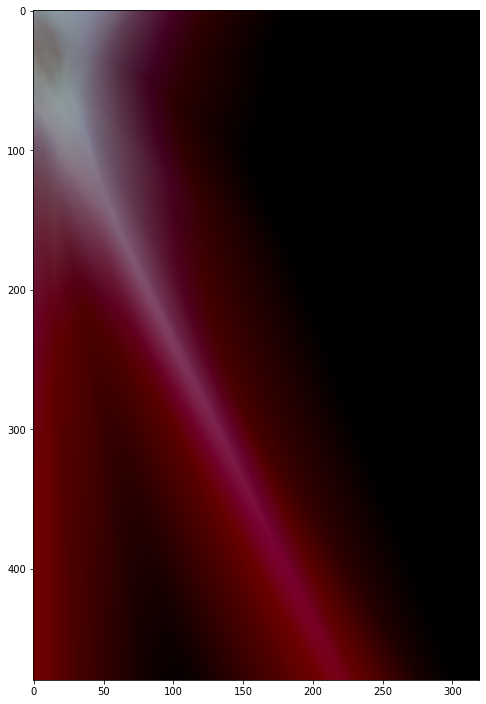

In [45]:
predict_image(model, target_h = 480, target_w = 320, base_img = images[0])

1.0